## Titanic
Vamos analisar os dados dos passageiros do Titanic. Começamos importando os dados de um arquivo csv.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')

Para termos um entendimento inicial do data frame utilizado, podemos utilizar o comando shape. Como o nome sugere, este comando nos informará o formato do dataframe em termos de linhas e colunas.

In [3]:
df.shape

(891, 15)

Para entendermos melhor o formato do data frame, podemos utilizar o comando head, que lista os 5 primeiros registros do data frame.

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Dá pra saber também os tipos de dados de cada coluna com o comando dtypes.

In [7]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Outro ponto importante é entender que na maioria dos dataframes há dados incompletos. Para analisar quais dados estão imcompletos no nosso dataframe usaremos o comando isnull.

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Vamos agora usar um pouco de estatística descritiva para termos alguns insights a respeito das informações dos passageiros do Titanic. Vamos começar analisando a média, a mediana e a moda da idade dos passageiros.

In [14]:
df.mean()['age']

/tmp/ipykernel_16896/1996622471.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()['age']


29.69911764705882

Vamos agora plotar histogramas das colunas nas quais é possível aplicar a geração automática de histogramas. A geração automática depende do tipo de dado da coluna.

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

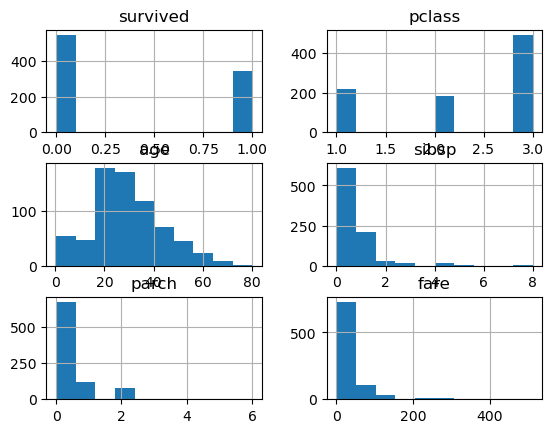

In [15]:
df.hist()

Vamos agora plotar um histograma de uma coluna específica (Idade).

array([[<Axes: title={'center': 'age'}>]], dtype=object)

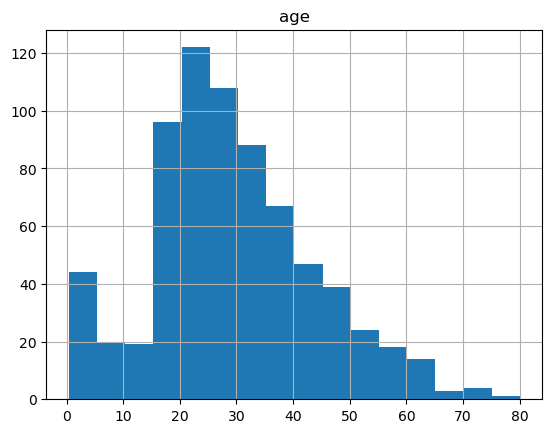

In [18]:
df.hist(column='age', bins=16)

Agora vamos plotar um histograma da tarifa paga por cada passageiro.

Por fim, vamos melhorar o gráfico que mostra o número de sobreviventes vs não sobreviventes.

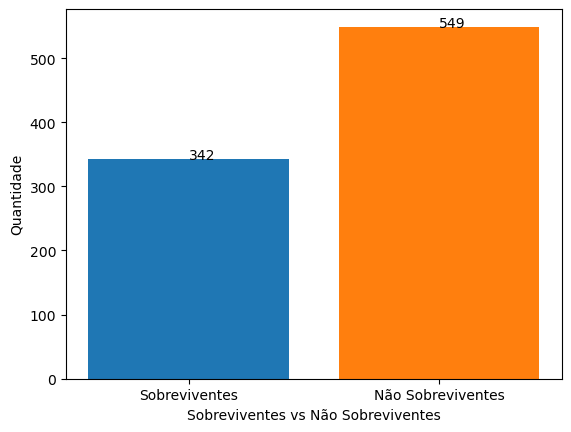

In [25]:
survived = df[df.survived == 1].count()[0]
not_survived = df[df.survived == 0].count()[0]
text = ['Sobreviventes', 'Não Sobreviventes']
labels = [survived, not_survived]

for bar in range(0,2):
    plt.bar(text[bar], labels[bar])
    plt.text(text[bar], labels[bar], str(labels[bar]))
    
plt.xlabel('Sobreviventes vs Não Sobreviventes')
plt.ylabel('Quantidade')
plt.show()

Vamos agora utilizar um gráfico de pizza para representar esta informação.

([<matplotlib.patches.Wedge at 0x7f1e4eda6e10>,
 [Text(-1.0275626481479563, 0.3925748388921016, 'Survived'),
  Text(1.0275626849034607, -0.39257474268474213, 'Not Survived')],
 [Text(-0.5604887171716125, 0.2141317303047827, '38.4%'),
  Text(0.5604887372200694, -0.21413167782804113, '61.6%')])

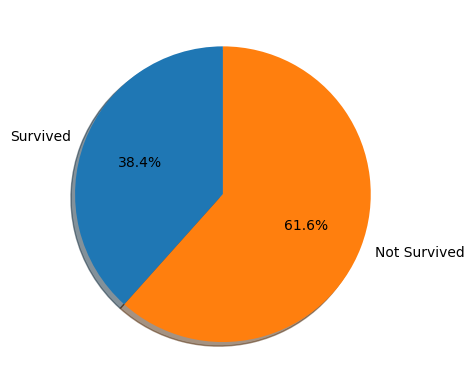

In [26]:
plt.pie([survived, not_survived], labels=['Survived', 'Not Survived'], autopct='%1.1f%%', shadow=True, startangle=90)